In [47]:
import pandas as pd
import sqlite3

In [48]:
# prepare sql database
conn = sqlite3.connect('siege.db')
cursor = conn.cursor()

In [49]:
def import_data(name, drop_last = False): # imports data into python, cleans it, and imports into sql

    if name == "everything":
        global everything, players

        everything = pd.read_csv(f"C:\\Users\\aethe\\OneDrive\\Desktop\\stats\\{name}.csv")
        everything = everything.drop(["Season", "Warm_Up"], axis = 1)
        
        players = []
        column_names = list(everything.columns)
        for column in column_names:
            if "_score" in column:
                players.append(column.replace("_score", ""))
    # needs to be done with everything

        # observations in Result column need to be standardized as convention changed over time
        results = list(everything["Result"])
        results_new = []
        for i in range(len(results)):
            results_new.append(results[i].lower())
        everything["Result"] = results_new

        everything.columns = everything.columns.str.lower()
        
        # import into sql
        cursor.execute("drop table if exists everything")
        everything.to_sql("everything", conn, index = False)
    
    else:
        global season
        
        season = pd.read_csv(f"C:\\Users\\aethe\\OneDrive\\Desktop\\stats\\{name}.csv")
        season = season.drop(["Date", "Session", "Warm_Up", "RP", "ΔRP"], axis = 1)
        
        if drop_last == True:
            season = season.drop(season.tail(1).index)

        season.columns = season.columns.str.lower()
        
        cursor.execute("drop table if exists season")
        season.to_sql("season", conn, index = False)
    
    return everything

In [50]:
import_data("everything")
import_data("y9s1_deadly_omen", drop_last = False) # change this depending on season & manual data cleanup

,game,map,squad_size,def_wins,def_losses,atk_wins,atk_losses,result,josh_score,josh_kills,...,p3_deaths,p3_assists,p4_score,p4_kills,p4_deaths,p4_assists,p5_score,p5_kills,p5_deaths,p5_assists
0,1,Coastline,NaN,NaN,NaN,NaN,NaN,win,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Theme Park,NaN,NaN,NaN,NaN,NaN,loss,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Chalet,NaN,NaN,NaN,NaN,NaN,loss,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Villa,NaN,NaN,NaN,NaN,NaN,win,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Club House,NaN,NaN,NaN,NaN,NaN,win,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,17,Lair,5.0,2.0,1.0,0.0,3.0,loss,1487.0,3.0,...,5.0,1.0,1315.0,3.0,5.0,0.0,1275.0,1.0,5.0,1.0
648,18,Theme Park,3.0,1.0,2.0,1.0,2.0,loss,1585.0,4.0,...,4.0,1.0,1402.0,4.0,5.0,1.0,845.0,0.0,6.0,1.0
649,19,Skyscraper,4.0,3.0,0.0,1.0,1.0,win,3979.0,5.0,...,1.0,1.0,3795.0,3.0,3.0,2.0,3680.0,2.0,5.0,1.0
650,20,Nighthaven Labs,3.0,0.0,2.0,1.0,2.0,loss,2395.0,2.0,...,4.0,3.0,1348.0,5.0,4.0,0.0,985.0,2.0,5.0,0.0


In [51]:
def get_sql_columns(name): # used for building the loop below
    cursor.execute(f"pragma table_info({name})")
    column_names = [desc[1] for desc in cursor.fetchall()]
    print(f"{name}: {column_names}")
    return

In [52]:
get_sql_columns("season")
get_sql_columns("everything")

season: ['game', 'map', 'squad_size', 'def_wins', 'def_losses', 'atk_wins', 'atk_losses', 'result', 'josh_score', 'josh_kills', 'josh_deaths', 'josh_assists', 'asa_score', 'asa_kills', 'asa_deaths', 'asa_assists', 'conell_score', 'conell_kills', 'conell_deaths', 'conell_assists', 'cole_score', 'cole_kills', 'cole_deaths', 'cole_assists', 'ed_score', 'ed_kills', 'ed_deaths', 'ed_assists', 'luke_score', 'luke_kills', 'luke_deaths', 'luke_assists', 'mike_score', 'mike_kills', 'mike_deaths', 'mike_assists', 'p1_score', 'p1_kills', 'p1_deaths', 'p1_assists', 'p2_score', 'p2_kills', 'p2_deaths', 'p2_assists', 'p3_score', 'p3_kills', 'p3_deaths', 'p3_assists', 'p4_score', 'p4_kills', 'p4_deaths', 'p4_assists', 'p5_score', 'p5_kills', 'p5_deaths', 'p5_assists']
everything: ['game', 'map', 'squad_size', 'def_wins', 'def_losses', 'atk_wins', 'atk_losses', 'result', 'josh_score', 'josh_kills', 'josh_deaths', 'josh_assists', 'asa_score', 'asa_kills', 'asa_deaths', 'asa_assists', 'cole_score', 'col

In [53]:
def get_player_data(player_name, dataframe): # gets individual player score, kills, deaths, assists, games and results

    cursor.execute(f"drop table if exists {player_name}_{dataframe}")
    cursor.execute(f"create table {player_name}_{dataframe} as \
                   select game, map, result, {player_name}_score, {player_name}_kills, {player_name}_deaths, {player_name}_assists from {dataframe}")
    cursor.execute(f"update {player_name}_{dataframe} set {player_name}_score = {player_name}_score - 2000 where result = 'win'")

    return

In [54]:
# future-proof way to get all players from the dataframes
players = []
column_names = list(everything.columns)
for column in column_names:
    if "_score" in column:
        players.append(column.replace("_score", ""))

dataframes = ["season", "everything"]

for p in players:
    for df in dataframes:
        get_player_data(p, df)

In [55]:
# pull the new tables back to python
# maybe we can generalize this? variable assignment i think means maybe not
player_tables = {f"{p}_{df}": pd.read_sql(f"select * from {p}_{df}", conn) for p in players for df in dataframes}

# shorthand, also leaves original dataframe in the dictionary in case i ruin these
josh_season, josh_everything = player_tables["josh_season"], player_tables["josh_everything"]
asa_season, asa_everything = player_tables["asa_season"], player_tables["asa_everything"]
# biggs_season, biggs_everything = player_tables["biggs_season"], player_tables["biggs_everything"]
cole_season, cole_everything = player_tables["cole_season"], player_tables["cole_everything"]
conell_season, conell_everything = player_tables["conell_season"], player_tables["conell_everything"]
ed_season, ed_everything = player_tables["ed_season"], player_tables["ed_everything"]
# jakob_season, jakob_everything = player_tables["jakob_season"], player_tables["jakob_everything"]
luke_season, luke_everything = player_tables["luke_season"], player_tables["luke_everything"]
mike_season, mike_everything = player_tables["mike_season"], player_tables["mike_everything"]
p1_season, p1_everything = player_tables["p1_season"], player_tables["p1_everything"]
p2_season, p2_everything = player_tables["p2_season"], player_tables["p2_everything"]
p3_season, p3_everything = player_tables["p3_season"], player_tables["p3_everything"]
p4_season, p4_everything = player_tables["p4_season"], player_tables["p4_everything"]
p5_season, p5_everything = player_tables["p5_season"], player_tables["p5_everything"]

In [56]:
# additional data cleanup
# change this to be generalizable

columns = [
                      "Josh_Score", "Josh_Kills", "Josh_Deaths", "Josh_Assists",
                      "Asa_Score", "Asa_Kills", "Asa_Deaths", "Asa_Assists",
                      # "Biggs_Score", "Biggs_Kills", "Biggs_Deaths", "Biggs_Assists",
                      "Cole_Score", "Cole_Kills", "Cole_Deaths", "Cole_Assists",
                      "Conell_Score", "Conell_Kills", "Conell_Deaths", "Conell_Assists",
                      "Ed_Score", "Ed_Kills", "Ed_Deaths", "Ed_Assists",
                      # "Jakob_Score", "Jakob_Kills", "Jakob_Deaths", "Jakob_Assists",
                      "Luke_Score", "Luke_Kills", "Luke_Deaths", "Luke_Assists",
                      "Mike_Score", "Mike_Kills", "Mike_Deaths", "Mike_Assists",
                      "P1_Score", "P1_Kills", "P1_Deaths", "P1_Assists",
                      "P2_Score", "P2_Kills", "P2_Deaths", "P2_Assists",
                      "P3_Score", "P3_Kills", "P3_Deaths", "P3_Assists",
                      "P4_Score", "P4_Kills", "P4_Deaths", "P4_Assists",
                      "P5_Score", "P5_Kills", "P5_Deaths", "P5_Assists"
]

columns = [c.lower() for c in columns]

season = season.drop(columns, axis = 1)
season = season.dropna()

everything = everything.drop(columns, axis = 1)
everything = everything.dropna()

# these columns have lots of empty entries that will ruin the tables if we dropna() before dropping these columns,
# and i don't need them anymore since they're in separate tables

In [57]:
# lists for all maps and squad sizes to iterate through
maps = sorted(list(everything["map"].unique()))
sizes = sorted(list(everything["squad_size"].unique()))

In [58]:
# overarching statistics for use in tables
season_wins = len(season[(season["result"] == "win")])
season_losses = len(season[(season["result"] == "loss")])
season_wl = season_wins/season_losses
season_games = len(season)

everything_wins = len(everything[(everything["result"] == "win")])
everything_losses = len(everything[(everything["result"] == "loss")])
everything_wl = everything_wins/everything_losses
everything_games = len(everything)

In [59]:
def win_loss_map(map_name):

    global season_map_wl, season_map_games, everything_map_wl, everything_map_games

    season_filtered = season[season["map"] == map_name]
    season_map_wins = len(season_filtered[(season_filtered["result"] == "win")])
    season_map_losses = len(season_filtered[(season_filtered["result"] == "loss")])
    season_map_games = len(season_filtered)
    if season_map_losses == 0:
        season_map_wl = season_map_wins
    else:
        season_map_wl = season_map_wins/season_map_losses

    everything_filtered = everything[everything["map"] == map_name]
    everything_map_wins = len(everything_filtered[(everything_filtered["result"] == "win")])
    everything_map_losses = len(everything_filtered[(everything_filtered["result"] == "loss")])
    everything_map_games = len(everything_filtered)
    if everything_map_losses == 0:
        everything_map_wl = everything_map_wins
    else:
        everything_map_wl = everything_map_wins/everything_map_losses

    return season_map_wl, season_map_games, everything_map_wl, everything_map_games

In [60]:
def win_loss_squad(squad_size):

    global season_squad_wl, season_squad_games, everything_squad_wl, everything_squad_games

    season_filtered = season[season["squad_size"] == squad_size]
    season_squad_wins = len(season_filtered[(season_filtered["result"] == "win")])
    season_squad_losses = len(season_filtered[(season_filtered["result"] == "loss")])
    season_squad_games = len(season_filtered)

    if season_squad_losses == 0:
        season_squad_wl = season_squad_wins
    else:
        season_squad_wl = season_squad_wins/season_squad_losses

    everything_filtered = everything[everything["squad_size"] == squad_size]
    everything_squad_wins = len(everything_filtered[(everything_filtered["result"] == "win")])
    everything_squad_losses = len(everything_filtered[(everything_filtered["result"] == "loss")])
    everything_squad_games = len(everything_filtered)

    if everything_squad_losses == 0:
        everything_squad_wl = everything_squad_wins
    else:
        everything_squad_wl = everything_squad_wins/everything_squad_losses

    return season_squad_wl, season_squad_games, everything_squad_wl, everything_squad_games

In [61]:
# building a win/loss table for maps

wl_maps = ["Average W/L"]
season_wl_ratios = [season_wl]
season_wl_count = ["na"]
everything_wl_ratios = [everything_wl]
everything_wl_count = ["na"]
# initial inputs set the first row of my final tables

for m in maps:
    win_loss_map(m)
    wl_maps.append(m)
    season_wl_ratios.append(season_map_wl)
    season_wl_count.append(season_map_games)
    everything_wl_ratios.append(everything_map_wl)
    everything_wl_count.append(everything_map_games)

wl_maps_table = pd.DataFrame({"map": wl_maps,
                              "season_wl": season_wl_ratios,
                              "season_games": season_wl_count,
                              "everything_wl": everything_wl_ratios,
                              "everything_games": everything_wl_count})
wl_maps_table.to_csv("C:\\Users\\aethe\\OneDrive\\Desktop\\stats\\wl_maps_y9s1.csv")

In [62]:
# building a win/loss table for squads

wl_squads = ["Average W/L"]
season_wl_ratios = [season_wl]
season_wl_count = ["na"]
everything_wl_ratios = [everything_wl]
everything_wl_count = ["na"]
# initial inputs set the first row of my final tables

for s in sizes:
    win_loss_squad(s)
    wl_squads.append(s)
    season_wl_ratios.append(season_squad_wl)
    season_wl_count.append(season_squad_games)
    everything_wl_ratios.append(everything_squad_wl)
    everything_wl_count.append(everything_squad_games)

wl_squads_table = pd.DataFrame({"size": wl_squads,
                                "season_wl": season_wl_ratios,
                                "season_games": season_wl_count,
                                "everything_wl": everything_wl_ratios,
                                "everything_games": everything_wl_count})
wl_squads_table.to_csv("C:\\Users\\aethe\\OneDrive\\Desktop\\stats\\wl_squads_y9s1.csv")

In [63]:
def performance(p, df): # something is going wrong, fi xit
                        # leaving this note here but im pretty sure its fixed    
    global avg_score, kd, wl

    d = player_tables[f"{p}_{df}"]
    d = d.dropna()
    
    total_score = d[f"{p}_score"].sum()
    games = len(d)
    
    kills = d[f"{p}_kills"].sum()
    deaths = d[f"{p}_deaths"].sum()
    
    wins = len(d[(d["result"] == "win")])
    losses = len(d[(d["result"] == "loss")])

    avg_score = total_score / games if games > 0 else total_score
    kd = kills / deaths if deaths > 0 else kills
    wl = wins / losses if losses > 0 else wins

    return avg_score, kd, wl

In [64]:
perform = pd.DataFrame()
columns = [f"{p}_{df}" for p in players for df in dataframes]

scores = []
kdr = []
wlr = []

for p in players:
    for df in dataframes:
        performance(p, df)
        scores.append(avg_score)
        kdr.append(kd)
        wlr.append(wl)

perform["Player & Timeframe"] = columns
perform["Score"] = scores
perform["W/L"] = wlr
perform["K/D"] = kdr

perform.to_csv("C:\\Users\\aethe\\OneDrive\\Desktop\\stats\\performance_summary_y9s1.csv")

### splitting up seasons to get average win/loss for old seasons

In [65]:
everything_breakdown = pd.read_csv("C:\\Users\\aethe\\OneDrive\\Desktop\\stats\\everything.csv")

In [66]:
results = list(everything_breakdown["Result"])
results_new = []
for i in range(len(results)):
    results_new.append(results[i].lower())
everything_breakdown["Result"] = results_new

everything_breakdown.columns = everything_breakdown.columns.str.lower()

In [67]:
solar_raid = everything_breakdown[everything_breakdown["season"] == "Y7S4"]
commanding_force = everything_breakdown[everything_breakdown["season"] == "Y8S1"]
dread_factor = everything_breakdown[everything_breakdown["season"] == "Y8S2"]
heavy_mettle = everything_breakdown[everything_breakdown["season"] == "Y8S3"]
deep_freeze = everything_breakdown[everything_breakdown["season"] == "Y8S4"]
deadly_omen = everything_breakdown[everything_breakdown["season"] == "Y9S1"]

In [68]:
sr_wins = len(solar_raid[solar_raid["result"] == "win"])
sr_losses = len(solar_raid[solar_raid["result"] == "loss"])
sr_wl = sr_wins / sr_losses

cf_wins = len(commanding_force[commanding_force["result"] == "win"])
cf_losses = len(commanding_force[commanding_force["result"] == "loss"])
cf_wl = cf_wins / cf_losses

dr_wins = len(dread_factor[dread_factor["result"] == "win"])
dr_losses = len(dread_factor[dread_factor["result"] == "loss"])
dr_wl = dr_wins / dr_losses

hm_wins = len(heavy_mettle[heavy_mettle["result"] == "win"])
hm_losses = len(heavy_mettle[heavy_mettle["result"] == "loss"])
hm_wl = hm_wins / hm_losses

de_wins = len(deep_freeze[deep_freeze["result"] == "win"])
de_losses = len(deep_freeze[deep_freeze["result"] == "loss"])
de_wl = de_wins / de_losses

do_wins = len(deadly_omen[deadly_omen["result"] == "win"])
do_losses = len(deadly_omen[deadly_omen["result"] == "loss"])
do_wl = do_wins / do_losses

In [69]:
season_ratios = {"Solar Raid": round(sr_wl, 2), "Commanding Force": round(cf_wl, 2), "Dread Factor": round(dr_wl, 2), "Heavy Mettle": round(hm_wl, 2), "Deep Freeze": round(de_wl, 2), "Deadly Omen": round(do_wl, 2)}

In [70]:
print(season_ratios)

{'Solar Raid': 1.15, 'Commanding Force': 1.02, 'Dread Factor': 1.11, 'Heavy Mettle': 0.95, 'Deep Freeze': 0.74, 'Deadly Omen': 0.91}


In [71]:
# checking kill/death trends as well

sr_kills = solar_raid["josh_kills"].sum()
sr_deaths = solar_raid["josh_deaths"].sum()
sr_kd = sr_kills / sr_deaths

cf_kills = commanding_force["josh_kills"].sum()
cf_deaths = commanding_force["josh_deaths"].sum()
cf_kd = cf_kills / cf_deaths

dr_kills = dread_factor["josh_kills"].sum()
dr_deaths = dread_factor["josh_deaths"].sum()
dr_kd = dr_kills / dr_deaths

hm_kills = heavy_mettle["josh_kills"].sum()
hm_deaths = heavy_mettle["josh_deaths"].sum()
hm_kd = hm_kills / hm_deaths

de_kills = deep_freeze["josh_kills"].sum()
de_deaths = deep_freeze["josh_deaths"].sum()
de_kd = de_kills / de_deaths

do_kills = deadly_omen["josh_kills"].sum()
do_deaths = deadly_omen["josh_deaths"].sum()
do_kd = do_kills / do_deaths

seasonal_kds = {
    "Solar Raid": round(sr_kd, 2),
    "SR Games": len(solar_raid),
    "Commanding Force": round(cf_kd, 2),
    "CF Games": len(commanding_force),
    "Dread Factor": round(dr_kd, 2),
    "DR Games": len(dread_factor),
    "Heavy Mettle": round(hm_kd, 2),
    "HM Games": len(heavy_mettle),
    "Deep Freeze": round(de_kd, 2),
    "DE Games": len(deep_freeze),
    "Deadly Omen": round(do_kd, 2),
    "DO Games": len(deadly_omen)
}

In [72]:
print(seasonal_kds)

{'Solar Raid': 0.7, 'SR Games': 155, 'Commanding Force': 0.73, 'CF Games': 162, 'Dread Factor': 0.62, 'DR Games': 95, 'Heavy Mettle': 0.58, 'HM Games': 160, 'Deep Freeze': 0.69, 'DE Games': 59, 'Deadly Omen': 1.01, 'DO Games': 21}


In [73]:
print(everything_breakdown)

    season  game warm_up               map  squad_size  def_wins  def_losses  \
0     Y7S4     1     NaN         Coastline         NaN       NaN         NaN   
1     Y7S4     2     NaN        Theme Park         NaN       NaN         NaN   
2     Y7S4     3     NaN            Chalet         NaN       NaN         NaN   
3     Y7S4     4     NaN             Villa         NaN       NaN         NaN   
4     Y7S4     5     NaN        Club House         NaN       NaN         NaN   
..     ...   ...     ...               ...         ...       ...         ...   
647   Y9S1    17  custom              Lair         5.0       2.0         1.0   
648   Y9S1    18    none        Theme Park         3.0       1.0         2.0   
649   Y9S1    19    none        Skyscraper         4.0       3.0         0.0   
650   Y9S1    20    none   Nighthaven Labs         3.0       0.0         2.0   
651   Y9S1    21    none  Kafe Dostoyevsky         5.0       NaN         NaN   

     atk_wins  atk_losses result  ...  

In [74]:
rounds_breakdown = everything_breakdown[["def_wins", "def_losses", "atk_wins", "atk_losses"]]

In [75]:
everything_breakdown["total_rounds"] = everything_breakdown["def_wins"] + everything_breakdown["def_losses"] + everything_breakdown["atk_wins"] + everything_breakdown["atk_losses"]

In [76]:
everything_breakdown.T

,0,1,2,3,4,5,6,7,8,9,...,642,643,644,645,646,647,648,649,650,651
season,Y7S4,Y7S4,Y7S4,Y7S4,Y7S4,Y7S4,Y7S4,Y7S4,Y7S4,Y7S4,...,Y9S1,Y9S1,Y9S1,Y9S1,Y9S1,Y9S1,Y9S1,Y9S1,Y9S1,Y9S1
game,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
warm_up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,custom,custom,custom,custom,custom,custom,none,none,none,none
map,Coastline,Theme Park,Chalet,Villa,Club House,Border,Chalet,Nighthaven Labs,Chalet,Kafe Dostoyevsky,...,Border,Villa,Oregon,Border,Lair,Lair,Theme Park,Skyscraper,Nighthaven Labs,Kafe Dostoyevsky
squad_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,3.0,5.0
def_wins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,4.0,2.0,2.0,1.0,3.0,0.0,NaN
def_losses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0,NaN
atk_wins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,1.0,2.0,0.0,1.0,1.0,1.0,NaN
atk_losses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,3.0,1.0,3.0,2.0,1.0,2.0,NaN
result,win,loss,loss,win,win,loss,win,win,win,win,...,loss,win,win,win,win,loss,loss,win,loss,loss


### checking some random stats

In [77]:
overtime_stats = everything_breakdown[everything_breakdown["total_rounds"] > 6]
print(f"OT games: {len(overtime_stats)}\nOT play rate: {round(len(overtime_stats) / len(everything_breakdown), 2) * 100}%")

ot_wins = len(overtime_stats[overtime_stats["result"] == "win"])
ot_losses = len(overtime_stats[overtime_stats["result"] == "loss"])

ot_wl = ot_wins / ot_losses

print(f"OT win/loss: {round(ot_wl * 100, 2)}%")

sweep_count = len(everything_breakdown[everything_breakdown["total_rounds"] == 4])

print(f"Times clean swept (won or lost): {sweep_count}")
print(f"4-0 play rate: {round(sweep_count / len(everything_breakdown), 2) * 100}%")

OT games: 122
OT play rate: 19.0%
OT win/loss: 93.65%
Times clean swept (won or lost): 69
4-0 play rate: 11.0%


### Personal K/D charts

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
josh_everything["josh_kdr"] = josh_everything["josh_kills"] / josh_everything["josh_deaths"] 

# creates season_start column with true where game = 1 else false, allows me to plot all data and divide on same chart
cursor.execute("drop table if exists josh_everything")
josh_everything.to_sql("josh_everything", conn, index = False)
cursor.execute("alter table josh_everything \
               add column season_start varchar(5)")
cursor.execute(
    """
    update josh_everything
    set season_start = 'True'
    where game = 1
    """
)
cursor.execute(
    """
    update josh_everything
    set season_start = 'False'
    where game != 1
    """
)
josh_everything = pd.read_sql("select * from josh_everything", conn)

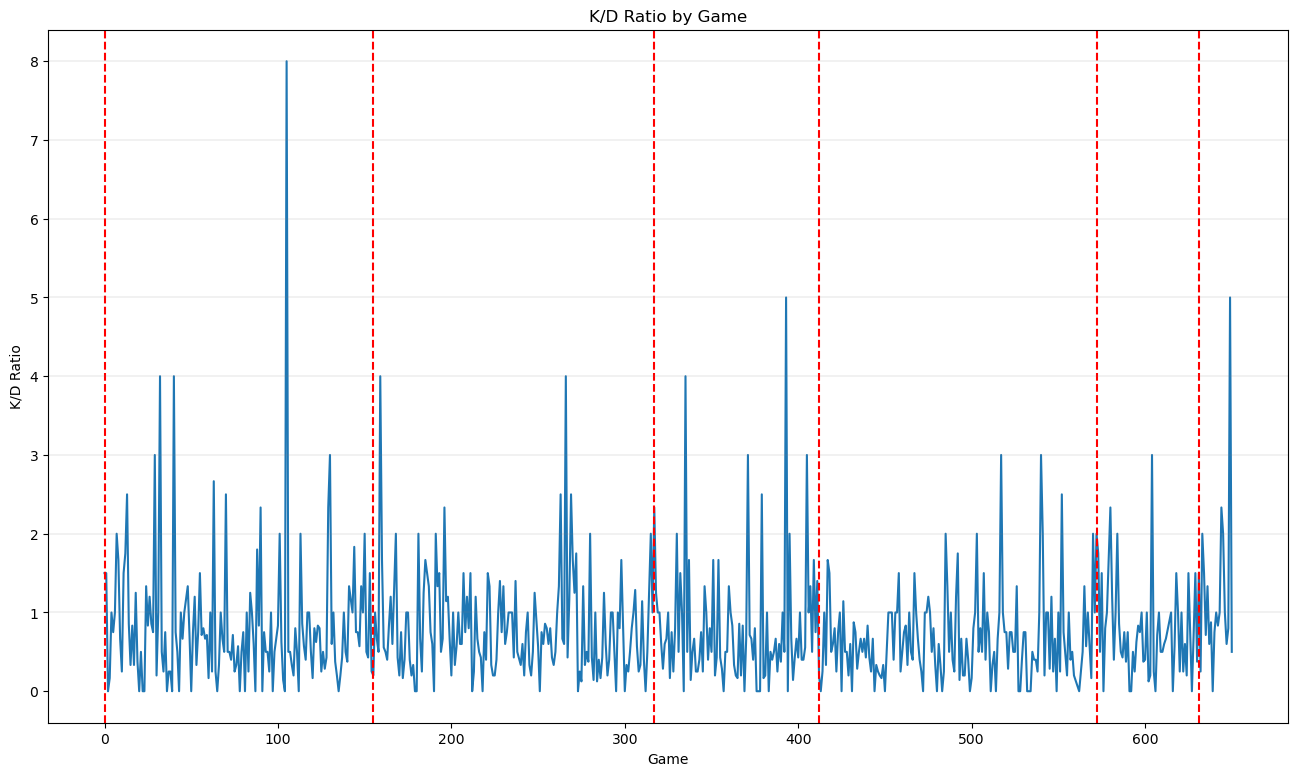

In [157]:
plt.rcParams["figure.figsize"] = 16, 9 # 16in x 9in

sns.lineplot(
    data = josh_everything["josh_kdr"],
    estimator = None
)

# this loop plots the seasonal dividers
i = 0
while i < len(josh_everything["season_start"]):
    if josh_everything["season_start"][i] == "True":
        plt.axvline(i, color = "red", linestyle = "--")
    i += 1

# this loop adds some guidelines to make the graph more readable
j = 1
while j <= 8:
    plt.axhline(
        y = j,
        color = "gray",
        linestyle = "-",
        linewidth = 0.15
    )
    j += 1

plt.xlabel("Game")
plt.ylabel("K/D Ratio")
plt.title("K/D Ratio by Game")

plt.show()